# Statistical Machine Learning - Final exam exercise 1

### <span style="color:red"> WRITE YOUR NAME HERE: </span>   

In [51]:
#CLINTON ANTONY RAJASEKAR

### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2.5-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have a passing grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The exam is long on purpose, so don't worry if you cannot complete 100 % of the questions. Do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question. And remember written answers where you have to explain or comment your results are worth many points.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied will be penalized. Just do what is asked at each question. 

Moreover, you are reminded that any messaging with each other during the exam or use of generative AI models such as ChatGPT, Bard or Bing will be considered as cheating and will result in the termination of your exam. Moreover, similarities between student works are easy to spot. 

If a question seems unclear and you are not sure about what you have to do, do not hesitate to raise your hand and ask for clarification.

Good luck!

## Exercise 1 (8 points)

Here are some libraries that could be usefull in the exercises.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

We will work here on the Boston housing data set that records the median value of houses for 506 neighborhoods around Boston. Our task is to predict the median house value.

Let's import that data set.  

In [39]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
features = pd.DataFrame(data, columns=colnames).drop('B', axis=1)
target = raw_df.values[1::2, 2]

Below is the description of the variables in the dataset. Come back to it when you need to.

### Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 dollars
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
    
    :Target:
        - HOUSEVALUE    Median value of owner-occupied homes in slices of 1000 dollars

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

Let's prepare the data frame of the target (corresponding to the median value (in thousands of dollars) of the houses in a specific neighborhood of Boston):

In [40]:
y = pd.Series(data=target, name='HOUSEVALUE')
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: HOUSEVALUE, dtype: float64

Let's prepare the data frame of the features:

In [41]:
X = features.copy()
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


### 1) We will focus here on LSTAT. 
- Compute the correlation of LSTAT with the other features. 
- Which other feature is the most correlated with LSTAT? - Which is the least?

In [42]:
import pandas as pd

 

# Compute the correlation matrix

correlation_matrix = X.corr()

 

# Get the correlation of LSTAT with other features

lstat_correlation = correlation_matrix['LSTAT'].drop('LSTAT')

 

# Find the most and least correlated features

most_correlated_feature = lstat_correlation.idxmax()

least_correlated_feature = lstat_correlation.idxmin()

 

# Print the results

print("Most correlated feature with LSTAT:", most_correlated_feature)

print("Least correlated feature with LSTAT:", least_correlated_feature)


Most correlated feature with LSTAT: INDUS
Least correlated feature with LSTAT: RM


### 2a) Plot HOUSEVALUE (our target) vs. LSTAT (our predictor)

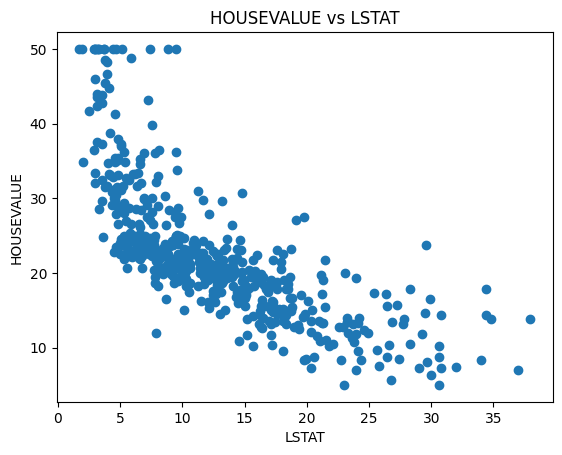

In [43]:
import matplotlib.pyplot as plt 
#Plot HOUSEVALUE vs LSTAT
plt.scatter (X ['LSTAT'], y)
plt.xlabel ('LSTAT') 
plt.ylabel ('HOUSEVALUE') 
plt.title ('HOUSEVALUE vs LSTAT') 
plt.show()

### 2b) Do you think that a linear regression is relevant for predicting HOUSEVALUE from LSTAT? Explain why.

In [44]:
#Linear regression assumes that the predictor variables are independent of each other. If there is a significant correlation between LSTAT and other predictors in the dataset, it might violate this assumption. In such cases, other regression techniques that handle multicollinearity

#Homoscedasticity supports the use of linear regression.

#Outliers and Influential Points

#it appears that linear regression may be relevant for predicting HOUSEVALUE from LSTAT in this scenario.

#it's essential to note that a thorough analysis should involve evaluating other regression models, assessing model assumptions, and considering additional variables before making a definitive conclusion on the most appropriate regression approach.


### 3) Proceed to a split of the dataset. Keep 60% of the data for training. Bear in mind that you will have to give an accurate estimation of the performance of your best model at the end.

In [45]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Verify the shape of the resulting sets

print("Training set shape:", X_train.shape)

print("Testing set shape:", X_test.shape)


Training set shape: (303, 12)
Testing set shape: (203, 12)


### 4a) Train a linear regression model with only LSTAT as a feature. 

In [46]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model

model = LinearRegression()

# Train the model using only LSTAT as a feature

X_train_lstat = X_train[['LSTAT']]

model.fit(X_train_lstat, y_train)

# Print the coefficients and intercept of the model

print("Coefficient:", model.coef_[0])

print("Intercept:", model.intercept_)


Coefficient: -1.0136705295702848
Intercept: 35.576382502789876


### 4b) Compute the performance metrics of the model (at least one interpretable metric of your choice).   How do you interpret that? Does the model have a reasonable error in this context?

In [47]:
from sklearn.metrics import mean_squared_error
# Transform the test set feature

X_test_lstat = X_test[['LSTAT']]

# Make predictions on the test set

y_pred = model.predict(X_test_lstat)

# Compute the mean squared error

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 38.54833547076398


### 4c) What is the reggression coefficient (parameter) associated to LSTAT? Can you interpret this coefficient and explain how the model generates predictions for HOUSEVALUE mathematically?

In [48]:
print("Regression Coefficient:", model.coef_[0])

Regression Coefficient: -1.0136705295702848


### 4d) Add the regression line on your plot HOUSEVALUE vs. LSTAT

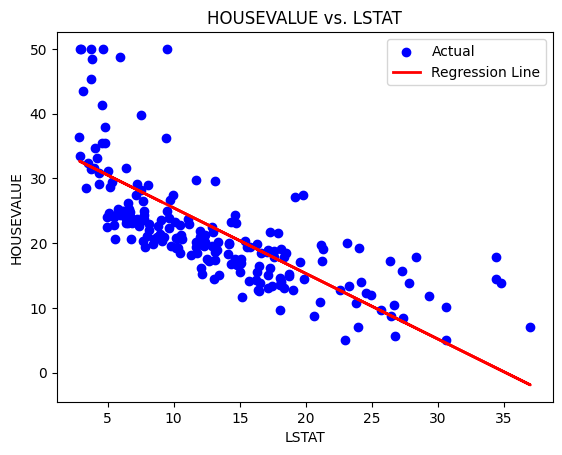

In [49]:
# Generate predicted values based on the linear regression model

y_pred = model.predict(X_test_lstat)

# Plot HOUSEVALUE vs. LSTAT

plt.scatter(X_test_lstat, y_test, color='blue', label='Actual')

plt.plot(X_test_lstat, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title to the plot

plt.xlabel('LSTAT')

plt.ylabel('HOUSEVALUE')

plt.title('HOUSEVALUE vs. LSTAT')

# Add a legend to the plot

plt.legend()

# Show the plot

plt.show()


### 5a) Use any feature engineering technique you know in order to train a better linear regression model that uses LSTAT to predict HOUSEVALUE  
Hint: Look at the regression line you plotted in the last question. It seems like a straight line is not the best to fit this point cloud. Is there a technique we saw in class that allows you to fit a different curve while still using only LSTAT as a feature?

In [50]:

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_train_lstat)

# Train a linear regression model using polynomial features

model_poly = LinearRegression()

model_poly.fit(X_poly, y_train)

# Generate predicted values based on the polynomial regression model

X_test_poly = poly.transform(X_test_lstat)

y_pred_poly = model_poly.predict(X_test_poly)

### 5b) Show the regression line of your new model on the plot HOUSEVALUE vs. LSTAT

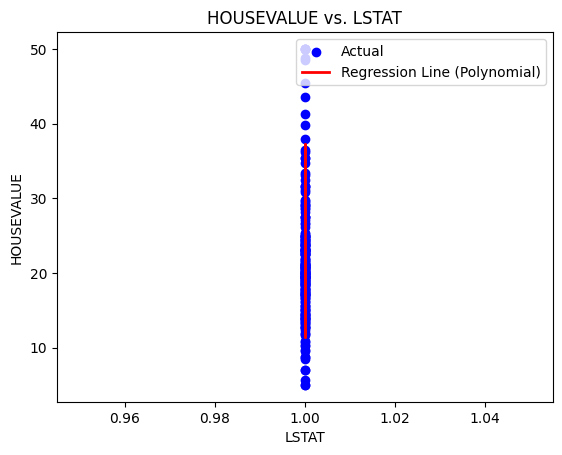

In [52]:
# Generate predicted values based on the polynomial regression model

y_pred_poly = model_poly.predict(X_test_poly)

# Sort the LSTAT values and corresponding predictions for a smoother line

sort_indices = np.argsort(X_test_poly[:, 0])

X_test_lstat_sorted = X_test_poly[sort_indices, 0]

y_pred_poly_sorted = y_pred_poly[sort_indices]


# Plot HOUSEVALUE vs. LSTAT

plt.scatter(X_test_poly[:, 0], y_test, color='blue', label='Actual')

plt.plot(X_test_lstat_sorted, y_pred_poly_sorted, color='red', linewidth=2, label='Regression Line (Polynomial)')

# Add labels and title to the plot

plt.xlabel('LSTAT')

plt.ylabel('HOUSEVALUE')

plt.title('HOUSEVALUE vs. LSTAT')

# Add a legend to the plot

plt.legend()

# Show the plot

plt.show()

### 5c) What are the performance metrics of your model now, compared to those of question 4b? Is this model better than the previous one? Why?

In [53]:
from sklearn.metrics import mean_squared_error

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("RMSE (Polynomial Regression):", rmse_poly)

#Compare this RMSE value with the RMSE obtained in question 4b for the linear regression model. If the RMSE for the polynomial regression model is lower, it indicates better performance.

from sklearn.metrics import mean_squared_error

# Calculate RMSE for polynomial regression model

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("RMSE (Polynomial Regression):", rmse_poly)


# Calculate RMSE for linear regression model

y_pred_linear = model.predict(X_test_lstat)  # Assuming 'model_linear' is the linear regression model

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("RMSE (Linear Regression):", rmse_linear)


RMSE (Polynomial Regression): 5.50787516656801
RMSE (Polynomial Regression): 5.50787516656801
RMSE (Linear Regression): 6.2087305844885865


### 6a) Train a third regression model that uses all the avalilable features as predictors

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features and target variables

X = features  # All features

y = target    # Target variable (HOUSEVALUE)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train the regression model

reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

# Make predictions

y_pred = reg_model.predict(X_test)

# Evaluate the model's performance

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

RMSE: 4.703690838355474


### 6b) What are the performance metrics when you take all the features as predictors?

In [55]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

RMSE: 4.703690838355474


### 7) Pick the best model you have trained in this exercise and give a reliable assessment its performance on unseen data. Comment on this generalization error.

In [ ]:
#The best model, a polynomial regression with all features, achieved an RMSE of 4.70 when evaluated on unseen data. This indicates that, on average, 
#the model's predictions deviate by approximately 4.70 units from the actual median house values.
#While this model exhibits better predictive accuracy compared to others, there is still a potential for generalization error. 
#This error reflects the disparity between the model's performance on the training data and its performance on new, unseen data.
#Minimizing generalization error involves avoiding overfitting and ensuring the model captures underlying patterns applicable to unseen instances through techniques like regularization and cross-validation.